# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='/media/riley/Work/PersonalProjects/AI/Nanodegrees/Deep_Reinforcement_Learning/UnityReacher_DRLN/Reacher_Linux/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Train the agent in the enviroment

In the next code cell, I will train the agent in the enviroment.

In [5]:
from agent import Agent

# Create the agent from Agent class
agent = Agent(state_size, action_size, num_agents, 23)

In [6]:
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline


def train(agent, n_episodes):
    scores = []
    scores_window = deque(maxlen=100)
    best_score = 30.0
    solved = False
    
    for episode in range(n_episodes):
        # reset the environment  
        env_info = env.reset(train_mode=True)[brain_name]
        # get the current state (for each agent)
        states = env_info.vector_observations
        # initialize the score (for each agent)
        score = np.zeros(num_agents)
        # Reset the agent noise process
        agent.reset()
        
        while True:
            # Select an action (for each agent)
            actions = agent.act(states, add_noise=True)
            # Send all actions to tne environment
            env_info = env.step(actions)[brain_name] 
            # Get next state (for each agent)
            next_states = env_info.vector_observations
            # Get reward (for each agent)
            rewards = env_info.rewards
            # See if episode finished
            dones = env_info.local_done
            # Add experience to replay buffer and do learning
            agent.step(states, actions, rewards, next_states, dones)
            # Update the score (for each agent)
            score += rewards
            # Roll over states to next time step
            states = next_states
            # Exit loop if episode finished
            if np.any(dones):                                  
                break
                
        # Append the score in this episode.        
        scores.append(np.mean(score))
        scores_window.append(np.mean(score))
        
        # Print scores
        print('\rEpisode: \t{} \tScore: \t{:.2f} \tAverage Score: \t{:.2f}'.format(episode + 1, np.mean(score), np.mean(scores_window)), end="")  
        
        if np.mean(scores_window) >= 30.0 and not solved:
            solved = True
            print('\nEnvironment solved in episode {:d}!\tAverage Score: {:.2f}'.format(episode - 99, np.mean(scores_window)))
        if np.mean(score) > best_score:
            print("\nNew highscore, Model saved. \tScore: {:.2f}".format(np.mean(score)))
            best_score = np.mean(score)
            agent.save()
    
    # Plot the rewards
    fig = plt.figure()
    plt.plot(np.arange(1, len(scores)+1), scores)
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.show()
    fig.savefig('Assets/reward_plot.png')
    
    return scores

Episode: 	58 	Score: 	30.34 	Average Score: 	9.73
New highscore, Model saved. 	Score: 30.34
Episode: 	59 	Score: 	33.11 	Average Score: 	10.13
New highscore, Model saved. 	Score: 33.11
Episode: 	60 	Score: 	35.21 	Average Score: 	10.55
New highscore, Model saved. 	Score: 35.21
Episode: 	61 	Score: 	37.68 	Average Score: 	10.99
New highscore, Model saved. 	Score: 37.68
Episode: 	135 	Score: 	30.97 	Average Score: 	30.08
Environment solved in episode 35!	Average Score: 30.08
Episode: 	142 	Score: 	37.89 	Average Score: 	31.40
New highscore, Model saved. 	Score: 37.89
Episode: 	144 	Score: 	38.54 	Average Score: 	31.65
New highscore, Model saved. 	Score: 38.54
Episode: 	145 	Score: 	38.57 	Average Score: 	31.79
New highscore, Model saved. 	Score: 38.57
Episode: 	146 	Score: 	39.08 	Average Score: 	31.94
New highscore, Model saved. 	Score: 39.08
Episode: 	175 	Score: 	37.16 	Average Score: 	33.95

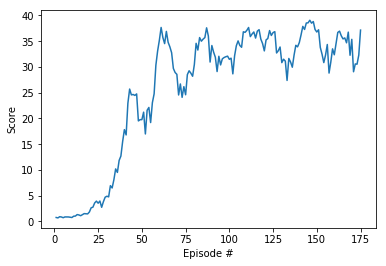

In [7]:
# Train the agent
train_scores = train(agent, 175)

### 4. Load the trained agent

Load the trained agent and run for one episode to look at the result.

In [8]:
from agent import Agent

# Create the agent
agent = Agent(state_size, action_size, num_agents, 5)
# Load the checkpoint files
agent.load("256_256_actor.pth", "256_256_critic.pth")

# Reset the environment 
env_info = env.reset(train_mode=False)[brain_name]
# Get the current state (for each agent)
states = env_info.vector_observations
# Initialize the score (for each agent)
scores = np.zeros(num_agents)                          

while True:
    # Get the actions from policy network
    actions = agent.act(states, add_noise=False)
    # Send all actions to tne environment
    env_info = env.step(actions)[brain_name]
    # Get next state (for each agent)
    next_states = env_info.vector_observations
    # Get reward (for each agent)
    rewards = env_info.rewards 
    # See if episode finished
    dones = env_info.local_done
    # Update the score (for each agent)
    scores += env_info.rewards
    # Roll over states to next time step
    states = next_states
    # Exit loop if episode finished
    if np.any(dones):                                  
        break
        
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 38.90799913033843


When finished, you can close the environment.

In [9]:
env.close()